# import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# import dataset

In [2]:
path = '/kaggle/input/housing-price-prediction/Housing.csv'
houses = pd.read_csv(path)
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# date cleaning

# check data types

In [3]:
houses.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
houses['price'] = houses['price'].astype(float)
houses['price']

0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64

In [5]:
houses['area'] = houses['area'].astype(float)
houses['area']

0      7420.0
1      8960.0
2      9960.0
3      7500.0
4      7420.0
        ...  
540    3000.0
541    2400.0
542    3620.0
543    2910.0
544    3850.0
Name: area, Length: 545, dtype: float64

# check Null values

In [6]:
houses.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# check duplicated values

In [7]:
houses.duplicated().sum()

0

# check data validity

In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [9]:
houses['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [10]:
houses.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# analysis

In [11]:
houses.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished


In [12]:
px.imshow(houses.corr(numeric_only=True),aspect=True,text_auto=True,color_continuous_scale='Blues')

# relation between area and price

In [13]:
px.histogram(data_frame=houses,x='area',y='price',height=400)

In [14]:
px.scatter(data_frame=houses,x='area',y='price',trendline='ols',height=400)

# relation between price and num of bathrooms

In [15]:
px.histogram(data_frame=houses,x='bathrooms',y='price',nbins=5,height=400)

# convert categorical data

In [16]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
dum_basement = pd.get_dummies(houses['basement'],drop_first=True)
dum_basement

,yes
0,0
1,0
2,1
3,1
4,1
...,...
540,1
541,0
542,0
543,0


In [18]:
dum_basement.rename(columns={'yes':'Basement'},inplace=True)
dum_basement

,Basement
0,0
1,0
2,1
3,1
4,1
...,...
540,1
541,0
542,0
543,0


In [19]:
dum_furnishingstatus = pd.get_dummies(houses['furnishingstatus'])
dum_furnishingstatus

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [20]:
dum_guestroom = pd.get_dummies(houses['guestroom'],drop_first=True)
dum_guestroom

,yes
0,0
1,0
2,0
3,0
4,1
...,...
540,0
541,0
542,0
543,0


In [21]:
dum_guestroom.rename(columns={'yes':'Guestroom'},inplace=True)
dum_guestroom

,Guestroom
0,0
1,0
2,0
3,0
4,1
...,...
540,0
541,0
542,0
543,0


In [22]:
dum_hotwaterheating = pd.get_dummies(houses['hotwaterheating'],drop_first=True)
dum_hotwaterheating

,yes
0,0
1,0
2,0
3,0
4,0
...,...
540,0
541,0
542,0
543,0


In [23]:
dum_hotwaterheating.rename(columns={'yes':'Hotwaterheating'},inplace=True)
dum_hotwaterheating

,Hotwaterheating
0,0
1,0
2,0
3,0
4,0
...,...
540,0
541,0
542,0
543,0


In [24]:
dum_mainroad = pd.get_dummies(houses['mainroad'],drop_first=True)
dum_mainroad

,yes
0,1
1,1
2,1
3,1
4,1
...,...
540,1
541,0
542,1
543,0


In [25]:
dum_mainroad.rename(columns={'yes':'Mainroad'},inplace=True)
dum_mainroad

,Mainroad
0,1
1,1
2,1
3,1
4,1
...,...
540,1
541,0
542,1
543,0


In [26]:
dum_prefarea = pd.get_dummies(houses['prefarea'],drop_first=True)
dum_prefarea

,yes
0,1
1,0
2,1
3,1
4,0
...,...
540,0
541,0
542,0
543,0


In [27]:
dum_prefarea.rename(columns={'yes':'Prefarea'},inplace=True)
dum_prefarea

,Prefarea
0,1
1,0
2,1
3,1
4,0
...,...
540,0
541,0
542,0
543,0


In [28]:
dum_airconditioning = pd.get_dummies(houses['airconditioning'],drop_first=True)
dum_airconditioning

,yes
0,1
1,1
2,0
3,1
4,1
...,...
540,0
541,0
542,0
543,0


In [29]:
dum_airconditioning.rename(columns={'yes':'Airconditioning'},inplace=True)
dum_airconditioning

,Airconditioning
0,1
1,1
2,0
3,1
4,1
...,...
540,0
541,0
542,0
543,0


In [30]:
houses = pd.concat([houses,dum_basement,dum_airconditioning,dum_furnishingstatus,dum_guestroom,dum_hotwaterheating,dum_mainroad,dum_prefarea],axis=1)
houses.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furnishingstatus,Basement,Airconditioning,furnished,semi-furnished,unfurnished,Guestroom,Hotwaterheating,Mainroad,Prefarea
0,13300000.0,7420.0,4,2,3,yes,no,no,no,yes,...,furnished,0,1,1,0,0,0,0,1,1
1,12250000.0,8960.0,4,4,4,yes,no,no,no,yes,...,furnished,0,1,1,0,0,0,0,1,0


In [31]:
houses.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'Basement',
       'Airconditioning', 'furnished', 'semi-furnished', 'unfurnished',
       'Guestroom', 'Hotwaterheating', 'Mainroad', 'Prefarea'],
      dtype='object')

In [32]:
houses.drop(columns=['mainroad','guestroom','hotwaterheating','airconditioning','prefarea','furnishingstatus','basement'],axis=1,inplace=True)

In [33]:
houses.head(2)

,price,area,bedrooms,bathrooms,stories,parking,Basement,Airconditioning,furnished,semi-furnished,unfurnished,Guestroom,Hotwaterheating,Mainroad,Prefarea
0,13300000.0,7420.0,4,2,3,2,0,1,1,0,0,0,0,1,1
1,12250000.0,8960.0,4,4,4,3,0,1,1,0,0,0,0,1,0


# test / train split data

In [34]:
houses.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'Basement', 'Airconditioning', 'furnished', 'semi-furnished',
       'unfurnished', 'Guestroom', 'Hotwaterheating', 'Mainroad', 'Prefarea'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y = houses['price']

In [37]:
X = houses.drop(columns='price',axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((436, 14), (436,), (109, 14), (109,))

# building model

# LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(max_iter=5000)

In [42]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [43]:
y_predict = model.predict(X_test)
y_predict.shape

(109,)

In [44]:
model.score(X_test,y_test)

0.045871559633027525

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_predict)

0.045871559633027525

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mae = mean_absolute_error(y_test,y_predict)
mae

1028711.0091743119

# SVC

In [49]:
from sklearn.svm import SVC

In [50]:
model = SVC()

In [51]:
model.fit(X_train,y_train)

SVC()

In [52]:
y_predict = model.predict(X_test)
y_predict.shape

(109,)

In [53]:
model.score(X_test,y_test)

0.027522935779816515

In [54]:
accuracy_score(y_test,y_predict)

0.027522935779816515

In [55]:
mae = mean_absolute_error(y_test,y_predict)
mae

1376848.623853211

# DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier()

In [58]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_predict = model.predict(X_test)
y_predict.shape

(109,)

In [60]:
model.score(X_test,y_test)

0.027522935779816515

In [61]:
accuracy_score(y_test,y_predict)

0.027522935779816515

In [62]:
mae = mean_absolute_error(y_test,y_predict)
mae

1123344.5871559633

# LinearRegression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
y_predict = model.predict(X_test)
y_predict.shape

(109,)

In [67]:
model.score(X_test,y_test)

0.6611214250980093

In [68]:
mae = mean_absolute_error(y_test,y_predict)
mae

716231.1189748812

# KNeighborsClassifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model = KNeighborsClassifier(n_neighbors=5)

In [71]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
y_predict = model.predict(X_test)
y_predict.shape

(109,)

In [73]:
model.score(X_test,y_test)

0.0

In [74]:
accuracy_score(y_test,y_predict)

0.0

In [75]:
mae = mean_absolute_error(y_test,y_predict)
mae

1537052.2935779816

In [76]:
neighbors = np.arange(1,10)

In [77]:
train_score = {}
test_score = {}

In [78]:
for neighbor in neighbors :
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    train_score[neighbor] = model.score(X_train,y_train)
    test_score[neighbor] = model.score(X_test,y_test)

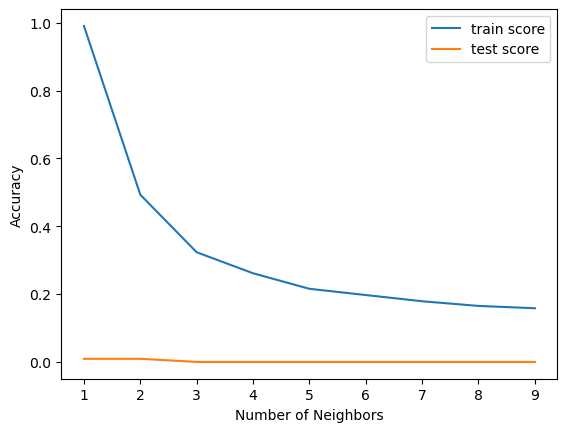

In [79]:
plt.plot(neighbors,train_score.values(),label='train score')
plt.plot(neighbors,test_score.values(),label='test score')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# LinearRegression is the best algorithm.

# Thank You